## VEHICLE DETECTION USING HOG/SVM

In [1]:
# Dataset source:
# https://github.com/udacity/CarND-Vehicle-Detection
# http://www.gti.ssr.upm.es/data/Vehicle_database.html
# http://www.cvlibs.net/datasets/kitti/
        

# DISPLAY IMAGES

In [2]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog 

In [3]:
#import training dataset of vehicles/non-vehicles
import glob
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')


In [4]:
len(car)

8792

In [5]:
len(no_car)

8968

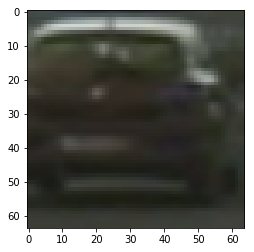

In [6]:
image_color = cv2.imread(car[300]) 
plt.imshow(image_color)

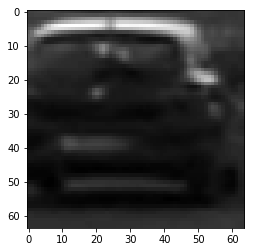

In [7]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

# find one car's HOG features for sanity check

In [9]:
features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualise = True, 
                          feature_vector = True)

features.shape 

/home/denim/anaconda3/envs/ana41py35/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(396,)

In [10]:
hog_image.shape

(64, 64)

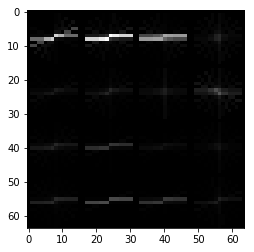

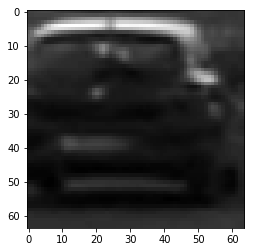

In [15]:
plt.imshow(hog_image, cmap = 'gray')
plt.show()
plt.imshow(image_gray, cmap = 'gray')

# HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION

## for all the cars at a time!

In [17]:
car[5]
# car contains the list of names of the images of the car

'data/car/GTI_Far/image0678.png'

In [19]:
car_hog_accum = []

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualise = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature)

/home/denim/anaconda3/envs/ana41py35/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [20]:
# we need a vertical stack of features for trainign of features
# so we are using the vstack from numpy
X_car = np.vstack(car_hog_accum).astype(np.float64)  
y_car = np.ones(len(X_car))
# As we already know that all the images contains cars 
# y = 1

In [21]:
X_car.shape

(8792, 396)

In [22]:
y_car.shape

(8792,)

In [16]:
y_car

array([1., 1., 1., ..., 1., 1., 1.])

## same approach for no car  

In [23]:
nocar_hog_accum = []

for i in no_car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualise = True, 
                                    feature_vector = True)
                
    nocar_hog_accum.append(nocar_hog_feature)

In [24]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)  
y_nocar = np.zeros(len(X_nocar))

In [25]:
X_nocar.shape

(8968, 396)

In [26]:
y_nocar.shape

(8968,)

# Append car and nocar data into X and y

In [27]:
X = np.vstack((X_car, X_nocar))
X.shape

(17760, 396)

In [28]:
y = np.hstack((y_car, y_nocar))
y.shape

(17760,)

# SVM MODEL CLASSIFIER TRAINING 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = LinearSVC()
%time svc_model.fit(X_train,y_train)

CPU times: user 727 ms, sys: 0 ns, total: 727 ms
Wall time: 730 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## predict for all the test images(feture lists)

In [32]:
y_predict = svc_model.predict(X_test)

## visulization of result

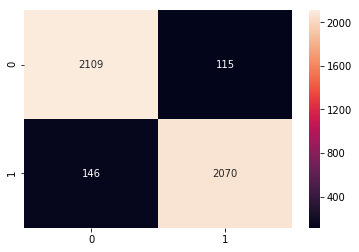

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      2224
         1.0       0.95      0.93      0.94      2216

   micro avg       0.94      0.94      0.94      4440
   macro avg       0.94      0.94      0.94      4440
weighted avg       0.94      0.94      0.94      4440



In [27]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.])

In [28]:
Model_TrueLabel = y_test[0:50]
Model_TrueLabel

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

# IMPROVE THE MODEL 

## Using Cross validation of course!

C and gamma are hyper parameters.
generally ppl use grid of values of C and gamma 

C:
which points will decide the support vector

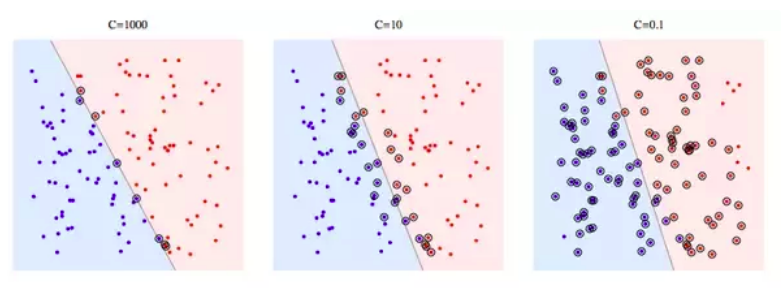

Gamma:
Gamma is propotional to bias!

A small gamma means a Gaussian with a large variance so the influence of x_j is more, i.e. if x_j is a support vector, a small gamma implies the class of this support vector will have influence on deciding the class of the vector x_i even if the distance between them is large. If gamma is large, then variance is small implying the support vector does not have wide-spread influence. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.

In [36]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
%time grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_

/home/denim/anaconda3/envs/ana41py35/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9578828828828829, total=  18.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9592342342342343, total=  18.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   59.8s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9583333333333334, total=  18.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9031531531531531, total=  36.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9002252252252252, total=  36.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.895045045045045, total=  36.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7281531531531531, total=  57.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7171171171171171, total=  58.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.722972972972973, total=  58.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5063063063063064, total=  58.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 32.8min finished


CPU times: user 32min 55s, sys: 3.7 s, total: 32min 59s
Wall time: 32min 59s


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2224
         1.0       0.99      0.99      0.99      2216

   micro avg       0.99      0.99      0.99      4440
   macro avg       0.99      0.99      0.99      4440
weighted avg       0.99      0.99      0.99      4440



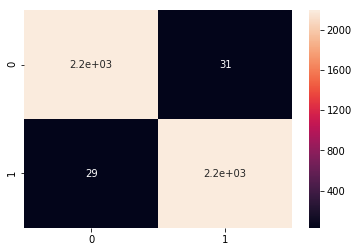

In [37]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# TEST THE MODEL (FIND CARS)!

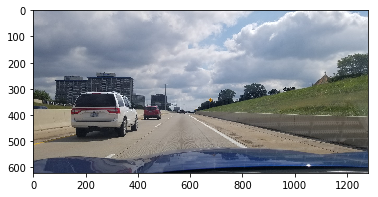

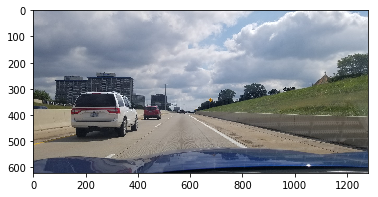

In [49]:
test_image = mpimg.imread('my_test_image_resized.jpg')
plt.imshow(test_image)
plt.show()
test_image = test_image.astype(np.float32)/255
plt.imshow(test_image)

(180, 1280, 3)

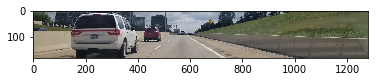

In [40]:
h_start = 300
h_stop = 480

pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3 


masked_region = test_image[h_start:h_stop,:,:]
plt.imshow(masked_region)
masked_region.shape


In [41]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(90, 640, 3)


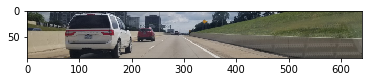

In [42]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)


In [45]:
    
print(masked_region_resized_R.shape)    
masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualise = True, feature_vector = False)
 

(90, 640)


/home/denim/anaconda3/envs/ana41py35/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [46]:
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # predict using trained SVM
        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        # test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))
                

(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)


In [47]:
rectangles_found

[((192, 300), (320, 428)), ((384, 300), (512, 428))]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


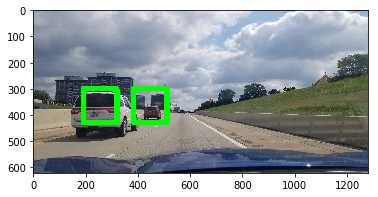

In [48]:
Image_with_Rectangles_Drawn = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 20)

plt.imshow(Image_with_Rectangles_Drawn)
        